**HOUSE PRICE PREDICTION USING MACHINE LEARNING IN KUALA LUMPUR**

Import Required Libraries and Load Data:

In [1]:
#importing libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
#load the data
df=pd.read_csv('data_kaggle.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38125 entries, 0 to 38124
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       38125 non-null  object 
 1   Price          37957 non-null  object 
 2   Rooms          36949 non-null  object 
 3   Bathrooms      36731 non-null  float64
 4   Car Parks      25617 non-null  float64
 5   Property Type  38100 non-null  object 
 6   Size           37399 non-null  object 
 7   Furnishing     33488 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.3+ MB


In [3]:
df

Location         Price Rooms  Bathrooms  \
0                   KLCC, Kuala Lumpur  RM 1,250,000   2+1        3.0   
1      Damansara Heights, Kuala Lumpur  RM 6,800,000     6        7.0   
2                Dutamas, Kuala Lumpur  RM 1,030,000     3        4.0   
3                 Cheras, Kuala Lumpur           NaN   NaN        NaN   
4            Bukit Jalil, Kuala Lumpur    RM 900,000   4+1        3.0   
...                                ...           ...   ...        ...   
38120        Kuchai Lama, Kuala Lumpur    RM 440,000     3        2.0   
38121        Sungai Besi, Kuala Lumpur    RM 650,000     2        2.0   
38122        City Centre, Kuala Lumpur  RM 2,350,000     4        4.0   
38123        Bukit Jalil, Kuala Lumpur    RM 980,000   4+1        3.0   
38124         KL Sentral, Kuala Lumpur  RM 1,900,000     2        2.0   

       Car Parks         Property Type                      Size  \
0            2.0    Serviced Residence  Built-up : 1,335 sq. ft.   
1            NaN              Bungalow  Land area : 6900 sq. ft.   
2            2.0  Condominium (Corner)  Built-up : 1,875 sq. ft.   
3            NaN                   NaN                       NaN   
4            2.0  Condominium (Corner)  Built-up : 1,513 sq. ft.   
...          ...                   ...                       ...   
38120        1.0    Serviced Residence    Built-up : 935 sq. ft.   
38121        2.0    Serviced Residence  Built-up : 1,025 sq. ft.   
38122        3.0           Condominium  Built-up : 4,569 sq. ft.   
38123        2.0           Condominium  Built-up : 1,513 sq. ft.   
38124        1.0       Serviced Reside                       NaN   

             Furnishing  
0       Fully Furnished  
1      Partly Furnished  
2      Partly Furnished  
3                   NaN  
4      Partly Furnished  
...                 ...  
38120  Partly Furnished  
38121               NaN  
38122               NaN  
38123   Fully Furnished  
38124               NaN  

[38125 rows x 8 columns]

In [4]:
#have to set our target first
def target_preprocess(df,col):
    df[col]=df[col].str.replace('RM','').str.replace(',','').apply(pd.to_numeric)
    df=df.loc[df[col].notna()]

    return df

In [5]:
df=target_preprocess(df,'Price')
df

Location      Price Rooms  Bathrooms  \
0                     KLCC, Kuala Lumpur  1250000.0   2+1        3.0   
1        Damansara Heights, Kuala Lumpur  6800000.0     6        7.0   
2                  Dutamas, Kuala Lumpur  1030000.0     3        4.0   
4              Bukit Jalil, Kuala Lumpur   900000.0   4+1        3.0   
5      Taman Tun Dr Ismail, Kuala Lumpur  5350000.0   4+2        5.0   
...                                  ...        ...   ...        ...   
38120          Kuchai Lama, Kuala Lumpur   440000.0     3        2.0   
38121          Sungai Besi, Kuala Lumpur   650000.0     2        2.0   
38122          City Centre, Kuala Lumpur  2350000.0     4        4.0   
38123          Bukit Jalil, Kuala Lumpur   980000.0   4+1        3.0   
38124           KL Sentral, Kuala Lumpur  1900000.0     2        2.0   

       Car Parks         Property Type                      Size  \
0            2.0    Serviced Residence  Built-up : 1,335 sq. ft.   
1            NaN              Bungalow  Land area : 6900 sq. ft.   
2            2.0  Condominium (Corner)  Built-up : 1,875 sq. ft.   
4            2.0  Condominium (Corner)  Built-up : 1,513 sq. ft.   
5            4.0              Bungalow  Land area : 7200 sq. ft.   
...          ...                   ...                       ...   
38120        1.0    Serviced Residence    Built-up : 935 sq. ft.   
38121        2.0    Serviced Residence  Built-up : 1,025 sq. ft.   
38122        3.0           Condominium  Built-up : 4,569 sq. ft.   
38123        2.0           Condominium  Built-up : 1,513 sq. ft.   
38124        1.0       Serviced Reside                       NaN   

             Furnishing  
0       Fully Furnished  
1      Partly Furnished  
2      Partly Furnished  
4      Partly Furnished  
5      Partly Furnished  
...                 ...  
38120  Partly Furnished  
38121               NaN  
38122               NaN  
38123   Fully Furnished  
38124               NaN  

[37957 rows x 8 columns]

In [6]:
#clean up location column
def clean_location(df,col):
    df.loc[:, col] = df[col].str.split(',', n=1, expand=True)[0]

    return df

In [7]:
df=clean_location(df,'Location')
df

Location      Price Rooms  Bathrooms  Car Parks  \
0                     KLCC  1250000.0   2+1        3.0        2.0   
1        Damansara Heights  6800000.0     6        7.0        NaN   
2                  Dutamas  1030000.0     3        4.0        2.0   
4              Bukit Jalil   900000.0   4+1        3.0        2.0   
5      Taman Tun Dr Ismail  5350000.0   4+2        5.0        4.0   
...                    ...        ...   ...        ...        ...   
38120          Kuchai Lama   440000.0     3        2.0        1.0   
38121          Sungai Besi   650000.0     2        2.0        2.0   
38122          City Centre  2350000.0     4        4.0        3.0   
38123          Bukit Jalil   980000.0   4+1        3.0        2.0   
38124           KL Sentral  1900000.0     2        2.0        1.0   

              Property Type                      Size        Furnishing  
0        Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1                  Bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2      Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
4      Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished  
5                  Bungalow  Land area : 7200 sq. ft.  Partly Furnished  
...                     ...                       ...               ...  
38120    Serviced Residence    Built-up : 935 sq. ft.  Partly Furnished  
38121    Serviced Residence  Built-up : 1,025 sq. ft.               NaN  
38122           Condominium  Built-up : 4,569 sq. ft.               NaN  
38123           Condominium  Built-up : 1,513 sq. ft.   Fully Furnished  
38124       Serviced Reside                       NaN               NaN  

[37957 rows x 8 columns]

In [8]:
df['Location'].unique()

array(['KLCC', 'Damansara Heights', 'Dutamas', 'Bukit Jalil',
       'Taman Tun Dr Ismail', 'Sri Petaling', 'Bukit Tunku (Kenny Hills)',
       'Mont Kiara', 'Desa ParkCity', 'Bangsar South', 'Ampang Hilir',
       'Kepong', 'Jalan Klang Lama (Old Klang Road)', 'Sungai Besi',
       'KL City', 'KL Sentral', 'Taman Melawati', 'Setapak',
       'City Centre', 'Country Heights Damansara', 'Taman Desa', 'Sentul',
       'Cheras', 'Bangsar', 'Segambut', 'Batu Caves', 'Wangsa Maju',
       'Ampang', 'Sri Hartamas', 'Klcc', 'Bukit Kiara', 'Setiawangsa',
       'OUG', 'Bukit Bintang', 'Jalan Sultan Ismail', 'Chan Sow Lin',
       'Jalan Kuching', 'Bandar Menjalara', 'KL Eco City', 'Seputeh',
       'Sunway SPK', 'Pantai', 'ADIVA Desa ParkCity', 'Kuchai Lama',
       'Jalan Ipoh', 'Mid Valley City', 'Brickfields', 'Desa Pandan',
       'Keramat', 'Pandan Indah', 'Desa Petaling', 'Federal Hill',
       'Other', 'Pandan Perdana', 'Bandar Damai Perdana', 'Puchong',
       'Salak Selatan', 'SEMARAK

In [9]:
df['Property Type'].unique()

array(['Serviced Residence', 'Bungalow', 'Condominium (Corner)',
       'Semi-detached House', '2-sty Terrace/Link House (EndLot)',
       'Apartment (Intermediate)',
       '2-sty Terrace/Link House (Intermediate)',
       'Bungalow (Intermediate)', 'Semi-detached House (Intermediate)',
       'Bungalow (Corner)', 'Serviced Residence (Intermediate)',
       'Condominium', 'Condominium (Intermediate)',
       'Condominium (EndLot)', 'Serviced Residence (Corner)',
       '3-sty Terrace/Link House (Intermediate)',
       'Serviced Residence (Duplex)', '2-sty Terrace/Link House',
       '2-sty Terrace/Link House (Corner)',
       '2.5-sty Terrace/Link House (Intermediate)',
       '3-sty Terrace/Link House (Corner)',
       '3-sty Terrace/Link House (EndLot)',
       '3.5-sty Terrace/Link House (Intermediate)',
       'Serviced Residence (Penthouse)', 'Condominium (Studio)',
       '1-sty Terrace/Link House (Intermediate)',
       '1.5-sty Terrace/Link House (EndLot)', 'Apartment',
      

In [10]:
#define functions to clean room columns
def clean_room_type(x):
    if isinstance(x, int):
        return float(x)
    elif isinstance(x, str):
        if '+' in x:
            nums = [int(n) for n in x.split('+') if n]
            return sum(nums) / len(nums)
        elif x == '20 above':
            return 25.0
        elif x == 'studio':
            return 4.0
    return 3

In [11]:
#apply the functions
df['Rooms'] = df['Rooms'].apply(clean_room_type)

<ipython-input-11-c0c2862cb914>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'] = df['Rooms'].apply(clean_room_type)


In [12]:
df

Location      Price  Rooms  Bathrooms  Car Parks  \
0                     KLCC  1250000.0    1.5        3.0        2.0   
1        Damansara Heights  6800000.0    3.0        7.0        NaN   
2                  Dutamas  1030000.0    3.0        4.0        2.0   
4              Bukit Jalil   900000.0    2.5        3.0        2.0   
5      Taman Tun Dr Ismail  5350000.0    3.0        5.0        4.0   
...                    ...        ...    ...        ...        ...   
38120          Kuchai Lama   440000.0    3.0        2.0        1.0   
38121          Sungai Besi   650000.0    3.0        2.0        2.0   
38122          City Centre  2350000.0    3.0        4.0        3.0   
38123          Bukit Jalil   980000.0    2.5        3.0        2.0   
38124           KL Sentral  1900000.0    3.0        2.0        1.0   

              Property Type                      Size        Furnishing  
0        Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1                  Bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2      Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
4      Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished  
5                  Bungalow  Land area : 7200 sq. ft.  Partly Furnished  
...                     ...                       ...               ...  
38120    Serviced Residence    Built-up : 935 sq. ft.  Partly Furnished  
38121    Serviced Residence  Built-up : 1,025 sq. ft.               NaN  
38122           Condominium  Built-up : 4,569 sq. ft.               NaN  
38123           Condominium  Built-up : 1,513 sq. ft.   Fully Furnished  
38124       Serviced Reside                       NaN               NaN  

[37957 rows x 8 columns]

In [13]:
#defining clean up functions
import ast

def clean_up_size(df, col):
    df[['SizeType', 'SizeValue']] = df[col].str.extract(r'^([^:]+) : (.*) sq\. ft\.$')
    df['SizeValue'] = df['SizeValue'].str.replace(',', '').str.replace('x', '*').str.replace('X', '*')

    def evaluate_expression(expr):
        try:
            return ast.literal_eval(expr)
        except:
            return None

    df['SizeValue'] = df['SizeValue'].apply(evaluate_expression).astype(float)

    return df

In [14]:
df=clean_up_size(df,'Size')
df

<ipython-input-13-e9741e922dbd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SizeType', 'SizeValue']] = df[col].str.extract(r'^([^:]+) : (.*) sq\. ft\.$')
<ipython-input-13-e9741e922dbd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SizeType', 'SizeValue']] = df[col].str.extract(r'^([^:]+) : (.*) sq\. ft\.$')
<ipython-input-13-e9741e922dbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Location      Price  Rooms  Bathrooms  Car Parks  \
0                     KLCC  1250000.0    1.5        3.0        2.0   
1        Damansara Heights  6800000.0    3.0        7.0        NaN   
2                  Dutamas  1030000.0    3.0        4.0        2.0   
4              Bukit Jalil   900000.0    2.5        3.0        2.0   
5      Taman Tun Dr Ismail  5350000.0    3.0        5.0        4.0   
...                    ...        ...    ...        ...        ...   
38120          Kuchai Lama   440000.0    3.0        2.0        1.0   
38121          Sungai Besi   650000.0    3.0        2.0        2.0   
38122          City Centre  2350000.0    3.0        4.0        3.0   
38123          Bukit Jalil   980000.0    2.5        3.0        2.0   
38124           KL Sentral  1900000.0    3.0        2.0        1.0   

              Property Type                      Size        Furnishing  \
0        Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished   
1                  Bungalow  Land area : 6900 sq. ft.  Partly Furnished   
2      Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished   
4      Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished   
5                  Bungalow  Land area : 7200 sq. ft.  Partly Furnished   
...                     ...                       ...               ...   
38120    Serviced Residence    Built-up : 935 sq. ft.  Partly Furnished   
38121    Serviced Residence  Built-up : 1,025 sq. ft.               NaN   
38122           Condominium  Built-up : 4,569 sq. ft.               NaN   
38123           Condominium  Built-up : 1,513 sq. ft.   Fully Furnished   
38124       Serviced Reside                       NaN               NaN   

        SizeType  SizeValue  
0       Built-up     1335.0  
1      Land area     6900.0  
2       Built-up     1875.0  
4       Built-up     1513.0  
5      Land area     7200.0  
...          ...        ...  
38120   Built-up      935.0  
38121   Built-up     1025.0  
38122   Built-up     4569.0  
38123   Built-up     1513.0  
38124        NaN        NaN  

[37957 rows x 10 columns]

In [15]:
df=df.drop('Size',axis=1)
df

Location      Price  Rooms  Bathrooms  Car Parks  \
0                     KLCC  1250000.0    1.5        3.0        2.0   
1        Damansara Heights  6800000.0    3.0        7.0        NaN   
2                  Dutamas  1030000.0    3.0        4.0        2.0   
4              Bukit Jalil   900000.0    2.5        3.0        2.0   
5      Taman Tun Dr Ismail  5350000.0    3.0        5.0        4.0   
...                    ...        ...    ...        ...        ...   
38120          Kuchai Lama   440000.0    3.0        2.0        1.0   
38121          Sungai Besi   650000.0    3.0        2.0        2.0   
38122          City Centre  2350000.0    3.0        4.0        3.0   
38123          Bukit Jalil   980000.0    2.5        3.0        2.0   
38124           KL Sentral  1900000.0    3.0        2.0        1.0   

              Property Type        Furnishing   SizeType  SizeValue  
0        Serviced Residence   Fully Furnished   Built-up     1335.0  
1                  Bungalow  Partly Furnished  Land area     6900.0  
2      Condominium (Corner)  Partly Furnished   Built-up     1875.0  
4      Condominium (Corner)  Partly Furnished   Built-up     1513.0  
5                  Bungalow  Partly Furnished  Land area     7200.0  
...                     ...               ...        ...        ...  
38120    Serviced Residence  Partly Furnished   Built-up      935.0  
38121    Serviced Residence               NaN   Built-up     1025.0  
38122           Condominium               NaN   Built-up     4569.0  
38123           Condominium   Fully Furnished   Built-up     1513.0  
38124       Serviced Reside               NaN        NaN        NaN  

[37957 rows x 9 columns]

In [16]:
#finding out nan value
df.isna().sum()

Location             0
Price                0
Rooms                0
Bathrooms         1352
Car Parks        12427
Property Type        0
Furnishing        4581
SizeType           786
SizeValue         4998
dtype: int64

In [17]:
df['Car Parks']=df['Car Parks'].fillna(0)
df

Location      Price  Rooms  Bathrooms  Car Parks  \
0                     KLCC  1250000.0    1.5        3.0        2.0   
1        Damansara Heights  6800000.0    3.0        7.0        0.0   
2                  Dutamas  1030000.0    3.0        4.0        2.0   
4              Bukit Jalil   900000.0    2.5        3.0        2.0   
5      Taman Tun Dr Ismail  5350000.0    3.0        5.0        4.0   
...                    ...        ...    ...        ...        ...   
38120          Kuchai Lama   440000.0    3.0        2.0        1.0   
38121          Sungai Besi   650000.0    3.0        2.0        2.0   
38122          City Centre  2350000.0    3.0        4.0        3.0   
38123          Bukit Jalil   980000.0    2.5        3.0        2.0   
38124           KL Sentral  1900000.0    3.0        2.0        1.0   

              Property Type        Furnishing   SizeType  SizeValue  
0        Serviced Residence   Fully Furnished   Built-up     1335.0  
1                  Bungalow  Partly Furnished  Land area     6900.0  
2      Condominium (Corner)  Partly Furnished   Built-up     1875.0  
4      Condominium (Corner)  Partly Furnished   Built-up     1513.0  
5                  Bungalow  Partly Furnished  Land area     7200.0  
...                     ...               ...        ...        ...  
38120    Serviced Residence  Partly Furnished   Built-up      935.0  
38121    Serviced Residence               NaN   Built-up     1025.0  
38122           Condominium               NaN   Built-up     4569.0  
38123           Condominium   Fully Furnished   Built-up     1513.0  
38124       Serviced Reside               NaN        NaN        NaN  

[37957 rows x 9 columns]

In [18]:
df['Furnishing']=df['Furnishing'].fillna('Unfurnished')
df

Location      Price  Rooms  Bathrooms  Car Parks  \
0                     KLCC  1250000.0    1.5        3.0        2.0   
1        Damansara Heights  6800000.0    3.0        7.0        0.0   
2                  Dutamas  1030000.0    3.0        4.0        2.0   
4              Bukit Jalil   900000.0    2.5        3.0        2.0   
5      Taman Tun Dr Ismail  5350000.0    3.0        5.0        4.0   
...                    ...        ...    ...        ...        ...   
38120          Kuchai Lama   440000.0    3.0        2.0        1.0   
38121          Sungai Besi   650000.0    3.0        2.0        2.0   
38122          City Centre  2350000.0    3.0        4.0        3.0   
38123          Bukit Jalil   980000.0    2.5        3.0        2.0   
38124           KL Sentral  1900000.0    3.0        2.0        1.0   

              Property Type        Furnishing   SizeType  SizeValue  
0        Serviced Residence   Fully Furnished   Built-up     1335.0  
1                  Bungalow  Partly Furnished  Land area     6900.0  
2      Condominium (Corner)  Partly Furnished   Built-up     1875.0  
4      Condominium (Corner)  Partly Furnished   Built-up     1513.0  
5                  Bungalow  Partly Furnished  Land area     7200.0  
...                     ...               ...        ...        ...  
38120    Serviced Residence  Partly Furnished   Built-up      935.0  
38121    Serviced Residence       Unfurnished   Built-up     1025.0  
38122           Condominium       Unfurnished   Built-up     4569.0  
38123           Condominium   Fully Furnished   Built-up     1513.0  
38124       Serviced Reside       Unfurnished        NaN        NaN  

[37957 rows x 9 columns]

In [19]:
df.isna().sum()

Location            0
Price               0
Rooms               0
Bathrooms        1352
Car Parks           0
Property Type       0
Furnishing          0
SizeType          786
SizeValue        4998
dtype: int64

In [20]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31768 entries, 0 to 38123
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       31768 non-null  object 
 1   Price          31768 non-null  float64
 2   Rooms          31768 non-null  float64
 3   Bathrooms      31768 non-null  float64
 4   Car Parks      31768 non-null  float64
 5   Property Type  31768 non-null  object 
 6   Furnishing     31768 non-null  object 
 7   SizeType       31768 non-null  object 
 8   SizeValue      31768 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.4+ MB


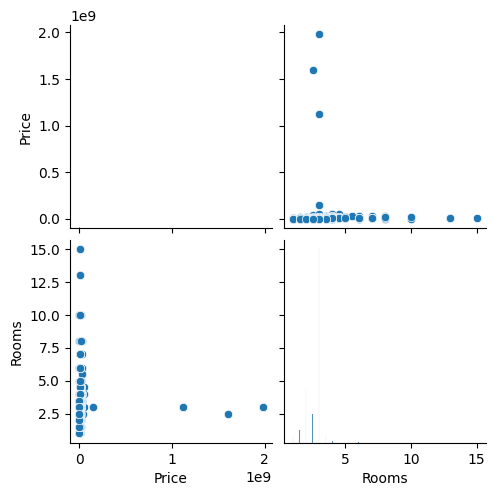

In [21]:
#let's do some pairplot
a=df['Price']
b=df['Rooms']

pairdf=pd.DataFrame({'Price':a,'Rooms':b})

pairplot=sns.pairplot(pairdf)
pairplot

In [22]:
df.describe()

Price         Rooms     Bathrooms     Car Parks     SizeValue
count  3.176800e+04  31768.000000  31768.000000  31768.000000  3.176800e+04
mean   1.949589e+06      2.699131      3.035224      1.416929  2.780598e+03
std    1.579785e+07      0.598100      1.636455      1.434379  6.259638e+04
min    3.080000e+02      1.000000      1.000000      0.000000  0.000000e+00
25%    5.650000e+05      2.500000      2.000000      0.000000  1.000000e+03
50%    9.800000e+05      3.000000      2.000000      1.000000  1.364000e+03
75%    2.000000e+06      3.000000      4.000000      2.000000  2.400000e+03
max    1.980000e+09     15.000000     20.000000     30.000000  1.100000e+07

In [23]:
df.dtypes

Location          object
Price            float64
Rooms            float64
Bathrooms        float64
Car Parks        float64
Property Type     object
Furnishing        object
SizeType          object
SizeValue        float64
dtype: object

In [24]:
df['Price']=df['Price']/1000000
df

<ipython-input-24-d4528d36a6e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price']/1000000


Location  Price  Rooms  Bathrooms  Car Parks  \
0                     KLCC  1.250    1.5        3.0        2.0   
1        Damansara Heights  6.800    3.0        7.0        0.0   
2                  Dutamas  1.030    3.0        4.0        2.0   
4              Bukit Jalil  0.900    2.5        3.0        2.0   
5      Taman Tun Dr Ismail  5.350    3.0        5.0        4.0   
...                    ...    ...    ...        ...        ...   
38119          Kuchai Lama  0.445    3.0        2.0        1.0   
38120          Kuchai Lama  0.440    3.0        2.0        1.0   
38121          Sungai Besi  0.650    3.0        2.0        2.0   
38122          City Centre  2.350    3.0        4.0        3.0   
38123          Bukit Jalil  0.980    2.5        3.0        2.0   

              Property Type        Furnishing   SizeType  SizeValue  
0        Serviced Residence   Fully Furnished   Built-up     1335.0  
1                  Bungalow  Partly Furnished  Land area     6900.0  
2      Condominium (Corner)  Partly Furnished   Built-up     1875.0  
4      Condominium (Corner)  Partly Furnished   Built-up     1513.0  
5                  Bungalow  Partly Furnished  Land area     7200.0  
...                     ...               ...        ...        ...  
38119    Serviced Residence  Partly Furnished   Built-up      935.0  
38120    Serviced Residence  Partly Furnished   Built-up      935.0  
38121    Serviced Residence       Unfurnished   Built-up     1025.0  
38122           Condominium       Unfurnished   Built-up     4569.0  
38123           Condominium   Fully Furnished   Built-up     1513.0  

[31768 rows x 9 columns]

In [25]:
df.describe()

Price         Rooms     Bathrooms     Car Parks     SizeValue
count  31768.000000  31768.000000  31768.000000  31768.000000  3.176800e+04
mean       1.949589      2.699131      3.035224      1.416929  2.780598e+03
std       15.797850      0.598100      1.636455      1.434379  6.259638e+04
min        0.000308      1.000000      1.000000      0.000000  0.000000e+00
25%        0.565000      2.500000      2.000000      0.000000  1.000000e+03
50%        0.980000      3.000000      2.000000      1.000000  1.364000e+03
75%        2.000000      3.000000      4.000000      2.000000  2.400000e+03
max     1980.000000     15.000000     20.000000     30.000000  1.100000e+07

In [26]:
df=df.loc[df['Price']<10]
df

Location  Price  Rooms  Bathrooms  Car Parks  \
0                     KLCC  1.250    1.5        3.0        2.0   
1        Damansara Heights  6.800    3.0        7.0        0.0   
2                  Dutamas  1.030    3.0        4.0        2.0   
4              Bukit Jalil  0.900    2.5        3.0        2.0   
5      Taman Tun Dr Ismail  5.350    3.0        5.0        4.0   
...                    ...    ...    ...        ...        ...   
38119          Kuchai Lama  0.445    3.0        2.0        1.0   
38120          Kuchai Lama  0.440    3.0        2.0        1.0   
38121          Sungai Besi  0.650    3.0        2.0        2.0   
38122          City Centre  2.350    3.0        4.0        3.0   
38123          Bukit Jalil  0.980    2.5        3.0        2.0   

              Property Type        Furnishing   SizeType  SizeValue  
0        Serviced Residence   Fully Furnished   Built-up     1335.0  
1                  Bungalow  Partly Furnished  Land area     6900.0  
2      Condominium (Corner)  Partly Furnished   Built-up     1875.0  
4      Condominium (Corner)  Partly Furnished   Built-up     1513.0  
5                  Bungalow  Partly Furnished  Land area     7200.0  
...                     ...               ...        ...        ...  
38119    Serviced Residence  Partly Furnished   Built-up      935.0  
38120    Serviced Residence  Partly Furnished   Built-up      935.0  
38121    Serviced Residence       Unfurnished   Built-up     1025.0  
38122           Condominium       Unfurnished   Built-up     4569.0  
38123           Condominium   Fully Furnished   Built-up     1513.0  

[31226 rows x 9 columns]

In [27]:
from google.colab import files
df.to_csv('cleaned.csv')
files.download('cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
df.describe()

Price         Rooms     Bathrooms     Car Parks     SizeValue
count  31226.000000  31226.000000  31226.000000  31226.000000  3.122600e+04
mean       1.580668      2.686479      2.968264      1.382854  2.570106e+03
std        1.627231      0.579062      1.547037      1.309373  6.299907e+04
min        0.000308      1.000000      1.000000      0.000000  0.000000e+00
25%        0.560000      2.500000      2.000000      0.000000  1.000000e+03
50%        0.950000      3.000000      2.000000      1.000000  1.345000e+03
75%        1.900000      3.000000      4.000000      2.000000  2.250000e+03
max        9.980000     15.000000     20.000000     30.000000  1.100000e+07

Label Encoding:
converting target variable into the numeric

In [29]:
from sklearn.preprocessing import LabelEncoder
#let's define the function for label encoding
def label_encoding(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column]=df[column].astype(str)
            le=LabelEncoder()
            df[column]=le.fit_transform(df[column])
    return df

In [30]:
df=label_encoding(df)
df

<ipython-input-29-d6aad7becf6c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=df[column].astype(str)
<ipython-input-29-d6aad7becf6c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=le.fit_transform(df[column])
<ipython-input-29-d6aad7becf6c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

Location  Price  Rooms  Bathrooms  Car Parks  Property Type  \
0            38  1.250    1.5        3.0        2.0             71   
1            22  6.800    3.0        7.0        0.0             39   
2            26  1.030    3.0        4.0        2.0             49   
4            13  0.900    2.5        3.0        2.0             49   
5            77  5.350    3.0        5.0        4.0             39   
...         ...    ...    ...        ...        ...            ...   
38119        44  0.445    3.0        2.0        1.0             71   
38120        44  0.440    3.0        2.0        1.0             71   
38121        68  0.650    3.0        2.0        2.0             71   
38122        19  2.350    3.0        4.0        3.0             48   
38123        13  0.980    2.5        3.0        2.0             48   

       Furnishing  SizeType  SizeValue  
0               0         0     1335.0  
1               1         1     6900.0  
2               1         0     1875.0  
4               1         0     1513.0  
5               1         1     7200.0  
...           ...       ...        ...  
38119           1         0      935.0  
38120           1         0      935.0  
38121           2         0     1025.0  
38122           2         0     4569.0  
38123           0         0     1513.0  

[31226 rows x 9 columns]

In [31]:
df=df.reset_index(drop=True)
df

Location  Price  Rooms  Bathrooms  Car Parks  Property Type  \
0            38  1.250    1.5        3.0        2.0             71   
1            22  6.800    3.0        7.0        0.0             39   
2            26  1.030    3.0        4.0        2.0             49   
3            13  0.900    2.5        3.0        2.0             49   
4            77  5.350    3.0        5.0        4.0             39   
...         ...    ...    ...        ...        ...            ...   
31221        44  0.445    3.0        2.0        1.0             71   
31222        44  0.440    3.0        2.0        1.0             71   
31223        68  0.650    3.0        2.0        2.0             71   
31224        19  2.350    3.0        4.0        3.0             48   
31225        13  0.980    2.5        3.0        2.0             48   

       Furnishing  SizeType  SizeValue  
0               0         0     1335.0  
1               1         1     6900.0  
2               1         0     1875.0  
3               1         0     1513.0  
4               1         1     7200.0  
...           ...       ...        ...  
31221           1         0      935.0  
31222           1         0      935.0  
31223           2         0     1025.0  
31224           2         0     4569.0  
31225           0         0     1513.0  

[31226 rows x 9 columns]

Correlation among the features

In [32]:
cols = ['Location','Price','Rooms','Bathrooms','Car Parks','Property Type','Furnishing','SizeType','SizeValue']

In [33]:
cor_matrix = df[cols].corr()
cor_matrix

Location     Price     Rooms  Bathrooms  Car Parks  \
Location       1.000000 -0.099115  0.031382   0.004185   0.015838   
Price         -0.099115  1.000000  0.069438   0.717023   0.252598   
Rooms          0.031382  0.069438  1.000000   0.062233   0.010544   
Bathrooms      0.004185  0.717023  0.062233   1.000000   0.307275   
Car Parks      0.015838  0.252598  0.010544   0.307275   1.000000   
Property Type  0.001402 -0.099789 -0.095062  -0.266976  -0.075778   
Furnishing     0.040304 -0.005630  0.077570   0.083011   0.023707   
SizeType       0.005487  0.364499  0.203427   0.379495   0.117192   
SizeValue     -0.005439  0.048971  0.007304   0.028794   0.003717   

               Property Type  Furnishing  SizeType  SizeValue  
Location            0.001402    0.040304  0.005487  -0.005439  
Price              -0.099789   -0.005630  0.364499   0.048971  
Rooms              -0.095062    0.077570  0.203427   0.007304  
Bathrooms          -0.266976    0.083011  0.379495   0.028794  
Car Parks          -0.075778    0.023707  0.117192   0.003717  
Property Type       1.000000   -0.170679 -0.282503  -0.012878  
Furnishing         -0.170679    1.000000  0.101995   0.011040  
SizeType           -0.282503    0.101995  1.000000   0.028539  
SizeValue          -0.012878    0.011040  0.028539   1.000000

<Axes: >

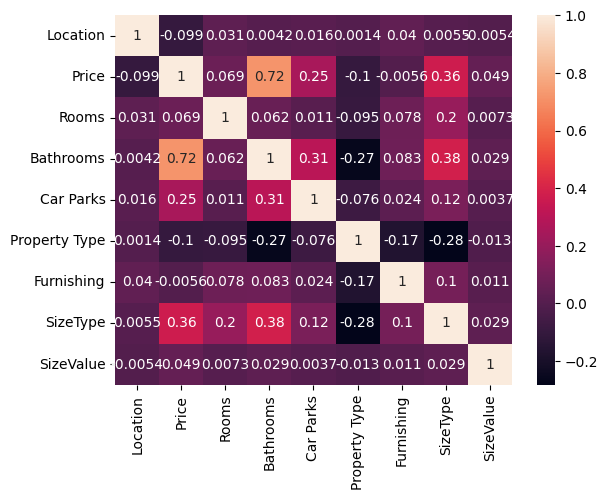

In [34]:
sns.heatmap(cor_matrix, annot=True)

<Axes: ylabel='Frequency'>

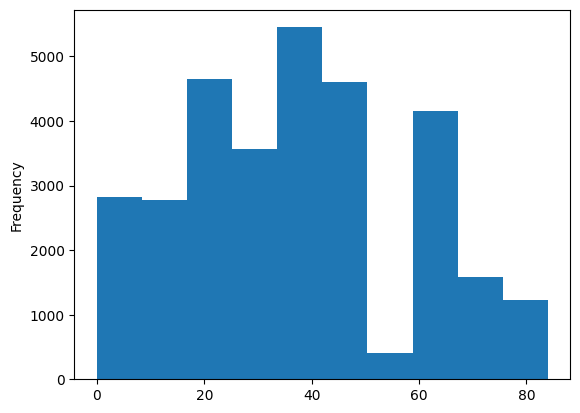

In [35]:
df['Location'].plot(kind='hist')

In [36]:
#and now let's split our data for X and y
X=df.drop('Price',axis=1)
y=df.Price

In [37]:
#import additional libraries and dependencies
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=429)

In [39]:
#let's call xgboost
reg=xgb.XGBRegressor(random_state=429)

In [40]:
#library for parameter search
params={
    "n_estimators":[300,500,1000],
    "max_depth": [12,24,50],
    "gamma": [0.01,0.1],
    "learning_rate": [0.01,0.1,1]
}

In [41]:
grid=GridSearchCV(estimator=reg,
                  param_grid=params,
                  scoring=["r2","neg_root_mean_squared_error"],
                  refit="r2",
                  cv=3,
                  verbose=100
)

In [42]:
# Perform grid search
grid.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3; 1/54] START gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300
[CV 1/3; 1/54] END gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300; neg_root_mean_squared_error: (test=-0.574) r2: (test=0.876) total time=   4.3s
[CV 2/3; 1/54] START gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300
[CV 2/3; 1/54] END gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300; neg_root_mean_squared_error: (test=-0.563) r2: (test=0.875) total time=   8.2s
[CV 3/3; 1/54] START gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300
[CV 3/3; 1/54] END gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300; neg_root_mean_squared_error: (test=-0.604) r2: (test=0.866) total time=   4.2s
[CV 1/3; 2/54] START gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=500
[CV 1/3; 2/54] END gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=500; neg_root_mean_squared_error: (tes

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=429, ...),
             param_grid={'gamma': [0.01, 0.1], 'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [12, 24, 50],
                         'n_estimators': [300, 500, 1000]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=100)

In [43]:
grid.best_score_

0.8793330666650646

In [44]:
final_reg=grid.best_estimator_

In [45]:
final_reg.save_model('housereg.json')

Use K Fold cross validation to measure accuracy

In [46]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from xgboost import XGBRegressor

# Assuming X and y are your data and target variables
# Replace X and y with your data
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(XGBRegressor(), X, y, cv=cv)


array([0.89262757, 0.89789299, 0.8901237 , 0.89829678, 0.88719559])

In [47]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Initialize and train XGBoost model
xgb_clf = XGBRegressor()
xgb_clf.fit(X_train, y_train)

# Evaluate the model
score = xgb_clf.score(X_test, y_test)
print("XGBoost Model Score:", score)


XGBoost Model Score: 0.8891562381781868


Another model training

In [48]:
# importing the model
model = XGBRegressor()

In [49]:
# training the model with X_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [51]:
print(training_data_prediction)

[0.40245217 0.4907629  0.41331196 ... 6.1656075  0.7117795  0.50216156]


In [52]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print('R squared error: ' , score_1)
print('Mean Absolute error: ', score_2)

R squared error:  0.9411495968683532
Mean Absolute error:  0.22081465734137157


Making a Predictive System

In [53]:
# importing the model
model = XGBRegressor()

In [54]:
# training the model with X_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
input_data=(40,1.5,3.0,2.0,79,0,0,1335.0)

In [56]:
#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print('The Predicted price of this house: RM', prediction[0])

The Predicted price of this house: RM 0.5400249


In [57]:
type(input_data[0])

int

In [58]:
import pickle
filename = "house_price_prediction_model.sav"
pickle.dump(model , open(filename,'wb'))
#loading. the saved model
loaded_model = pickle.load(open('house_price_prediction_model.sav','rb'))

In [59]:
input_data=(23,3.0,7.0,0.0,44,1,1,6900.0)

#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print('The Predicted price of this house: RM', prediction[0])

The Predicted price of this house: RM 6.4657497


In [60]:
#columns in dataframe
df.columns

Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Furnishing', 'SizeType', 'SizeValue'],
      dtype='object')

In [61]:
df.head()

Location  Price  Rooms  Bathrooms  Car Parks  Property Type  Furnishing  \
0        38   1.25    1.5        3.0        2.0             71           0   
1        22   6.80    3.0        7.0        0.0             39           1   
2        26   1.03    3.0        4.0        2.0             49           1   
3        13   0.90    2.5        3.0        2.0             49           1   
4        77   5.35    3.0        5.0        4.0             39           1   

   SizeType  SizeValue  
0         0     1335.0  
1         1     6900.0  
2         0     1875.0  
3         0     1513.0  
4         1     7200.0

In [62]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pandas as pd

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 200, 300],
            }
        },
        'xgboost': {
            'model': xgb.XGBRegressor(),
            'params': {
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7],
                'n_estimators': [100, 200, 300]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)


model  best_score  \
0  linear_regression    0.560000   
1      random_forest    0.900130   
2            xgboost    0.901771   

                                         best_params  
0                                                 {}  
1                              {'n_estimators': 300}  
2  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...

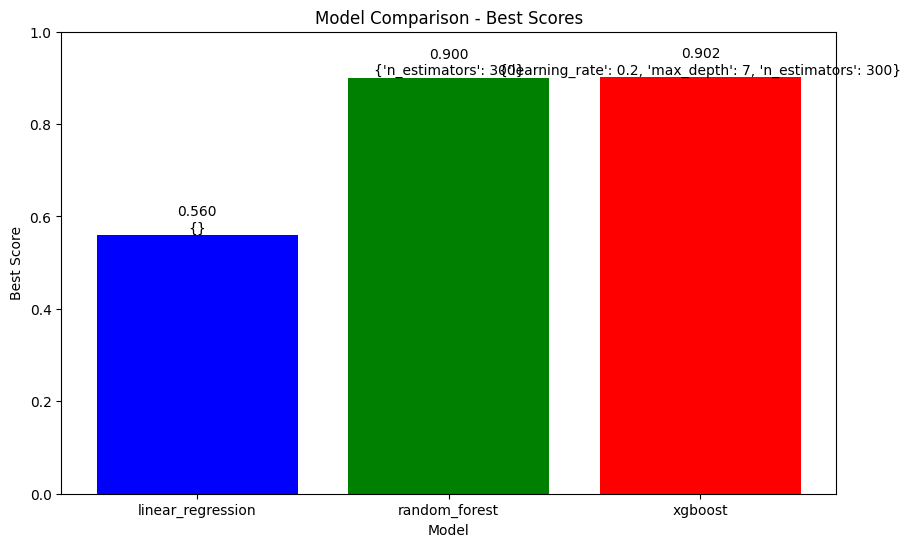

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data (you would replace this with the actual output of your function)
results = pd.DataFrame({
    'model': ['linear_regression', 'random_forest', 'xgboost'],
    'best_score': [0.560000, 0.900130, 0.901771],
    'best_params': [{}, {'n_estimators': 300}, {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}]
})

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(results['model'], results['best_score'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Best Score')
plt.title('Model Comparison - Best Scores')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1

# Display the best parameters for each model on the plot
for i, (model, score, params) in enumerate(zip(results['model'], results['best_score'], results['best_params'])):
    plt.text(i, score, f'{score:.3f}\n{params}', ha='center', va='bottom')

plt.show()


In [63]:
from google.colab import files
df.to_csv('housing.csv')
files.download('housing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# Optimal parameters found through GridSearchCV
params_lr = {}
params_rf = {'n_estimators': 300}
params_xgb = {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


In [66]:
# Linear Regression
lr_model = LinearRegression(**params_lr)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(**params_rf)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(**params_xgb)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [67]:
# Linear Regression metrics
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Random Forest metrics
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# XGBoost metrics
mae_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)


In [68]:
# Create a DataFrame to compare results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'MSE': [mse_lr, mse_rf, mse_xgb],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb]
})

print(results)


               Model       MAE       MSE      RMSE
0  Linear Regression  0.704611  1.172903  1.083006
1      Random Forest  0.234865  0.269722  0.519347
2            XGBoost  0.256826  0.290162  0.538667


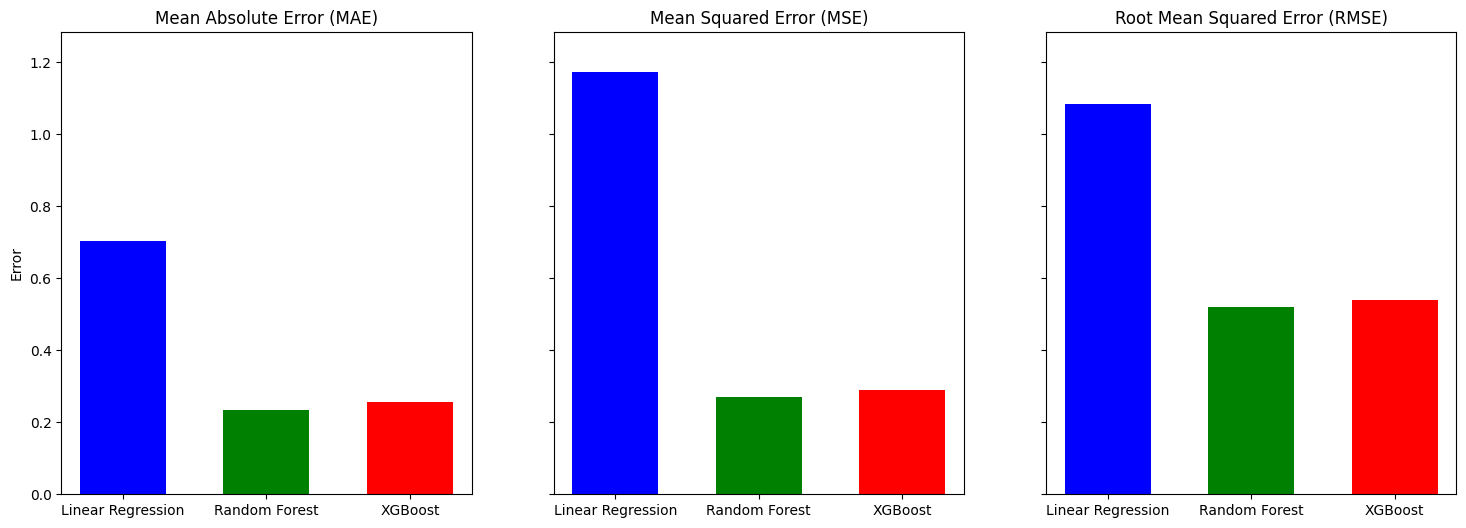

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy metrics for each model
metrics_data = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [0.704611, 0.234865, 0.256826],
    'MSE': [1.172903, 0.269722, 0.290162],
    'RMSE': [1.083006, 0.519347, 0.538667]
}

# Convert metrics data to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics_data)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define the bar width
bar_width = 0.6

# Plot MAE
axes[0].bar(metrics_df['Model'], metrics_df['MAE'], color=['blue', 'green', 'red'], width=bar_width)
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('Error')
axes[0].set_ylim(0, max(metrics_df['MAE']) + 0.1)

# Plot MSE
axes[1].bar(metrics_df['Model'], metrics_df['MSE'], color=['blue', 'green', 'red'], width=bar_width)
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylim(0, max(metrics_df['MSE']) + 0.2)

# Plot RMSE
axes[2].bar(metrics_df['Model'], metrics_df['RMSE'], color=['blue', 'green', 'red'], width=bar_width)
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_ylim(0, max(metrics_df['RMSE']) + 0.2)

# Display the plot
plt.show()
